In [1]:
%matplotlib inline
from marketdata import *
from model import *
from analytics import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from datetime import datetime

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Load data 


In [30]:
FundAUM=1e6
mkts=get_market_list()
df=pd.DataFrame()
for m in mkts:
    try:
        df[m]=get_timeseries(m)
    except:
        print m

# Charts for email to be sent once data is gathered and signals calculated

In [33]:
lots=calc_positions_two_lookbacks(10,40,mkts,df,FundAUM).dropna(how='all')

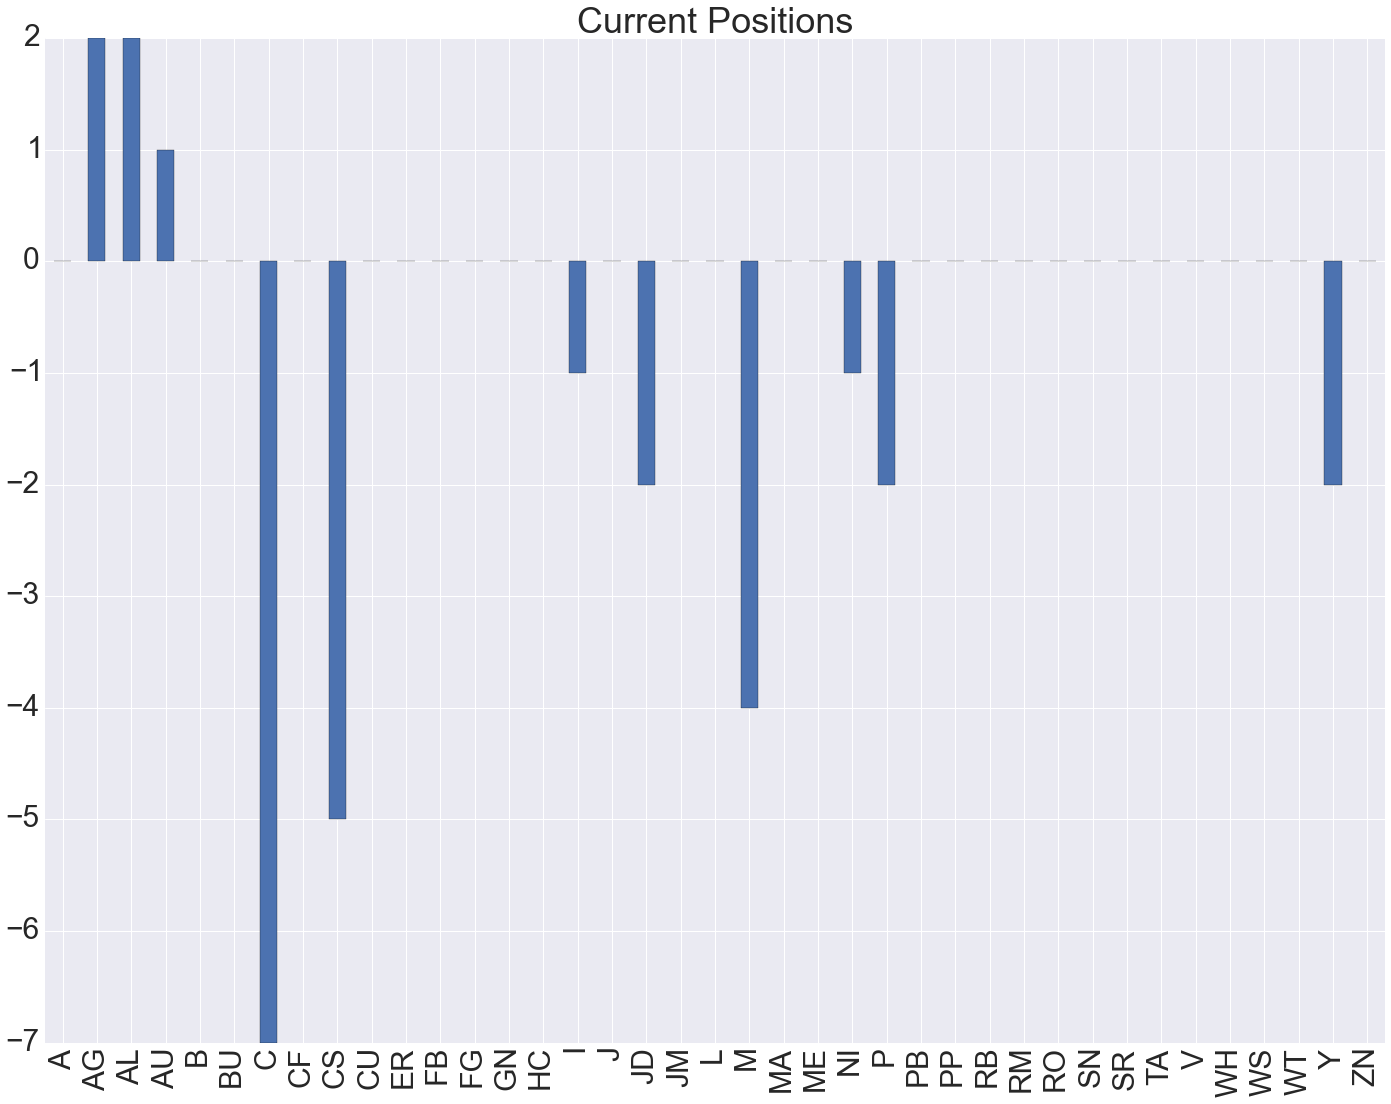

In [34]:
lots.ix[lots.index[-1]].plot(kind='bar',title='Current Positions')

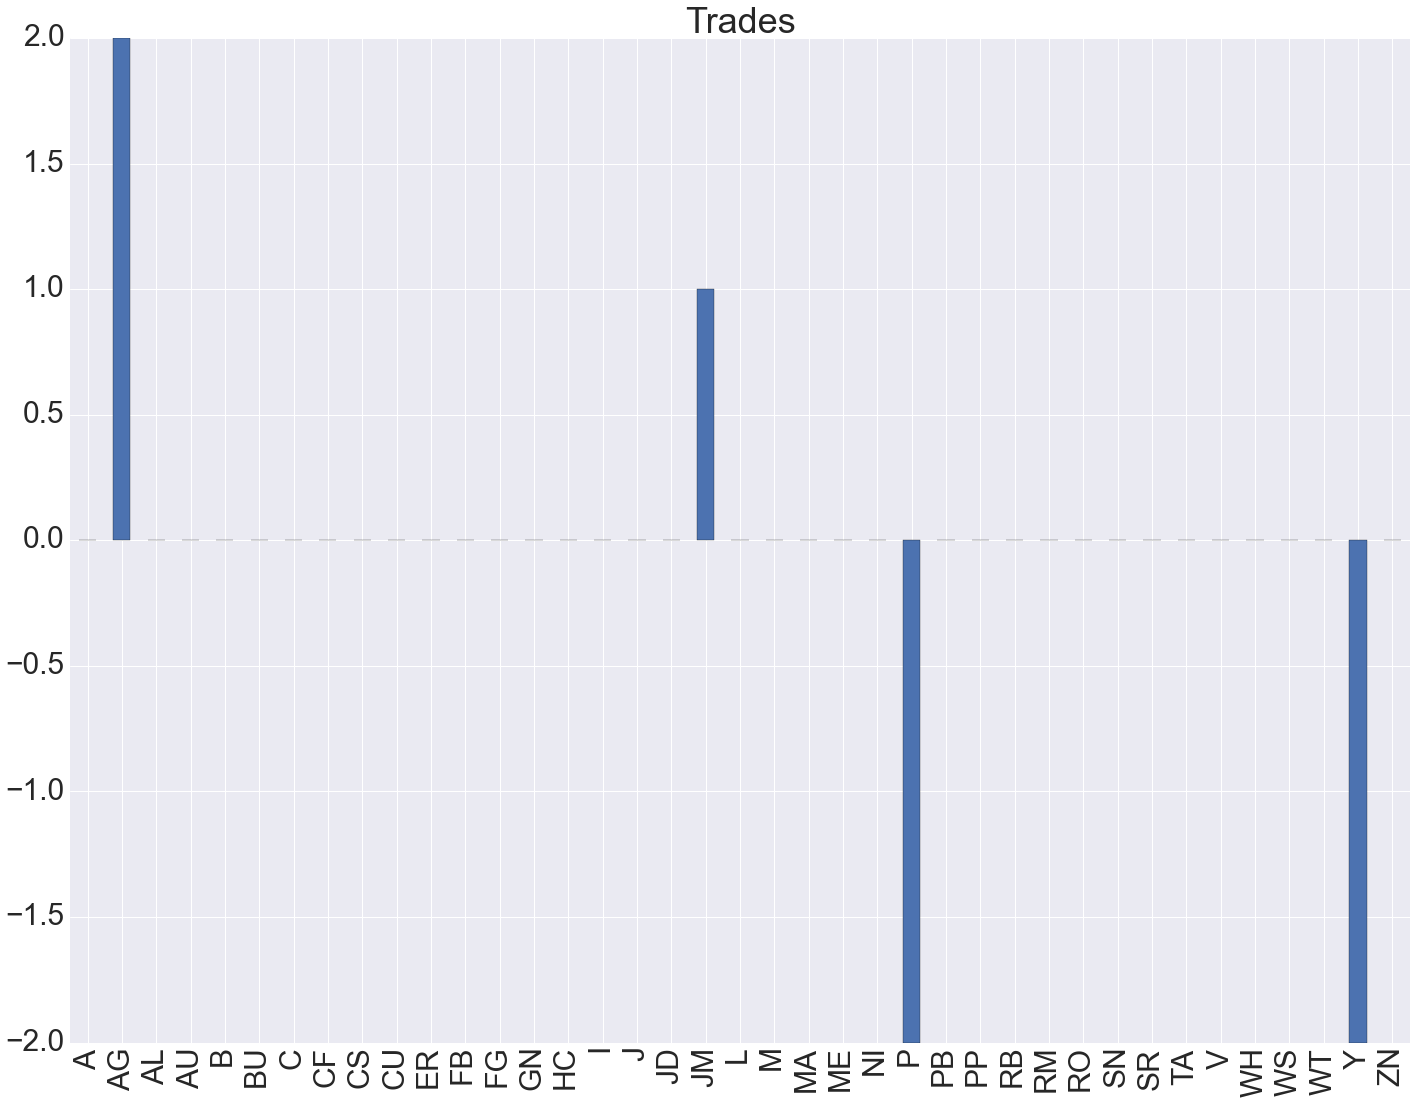

In [35]:
lots.diff().ix[lots.index[-1]].plot(kind='bar',title='Trades')

In [36]:
curr_px=get_most_liquid_price(mkts)
PNL = calc_pnl_position_wc(lots,df,curr_px)

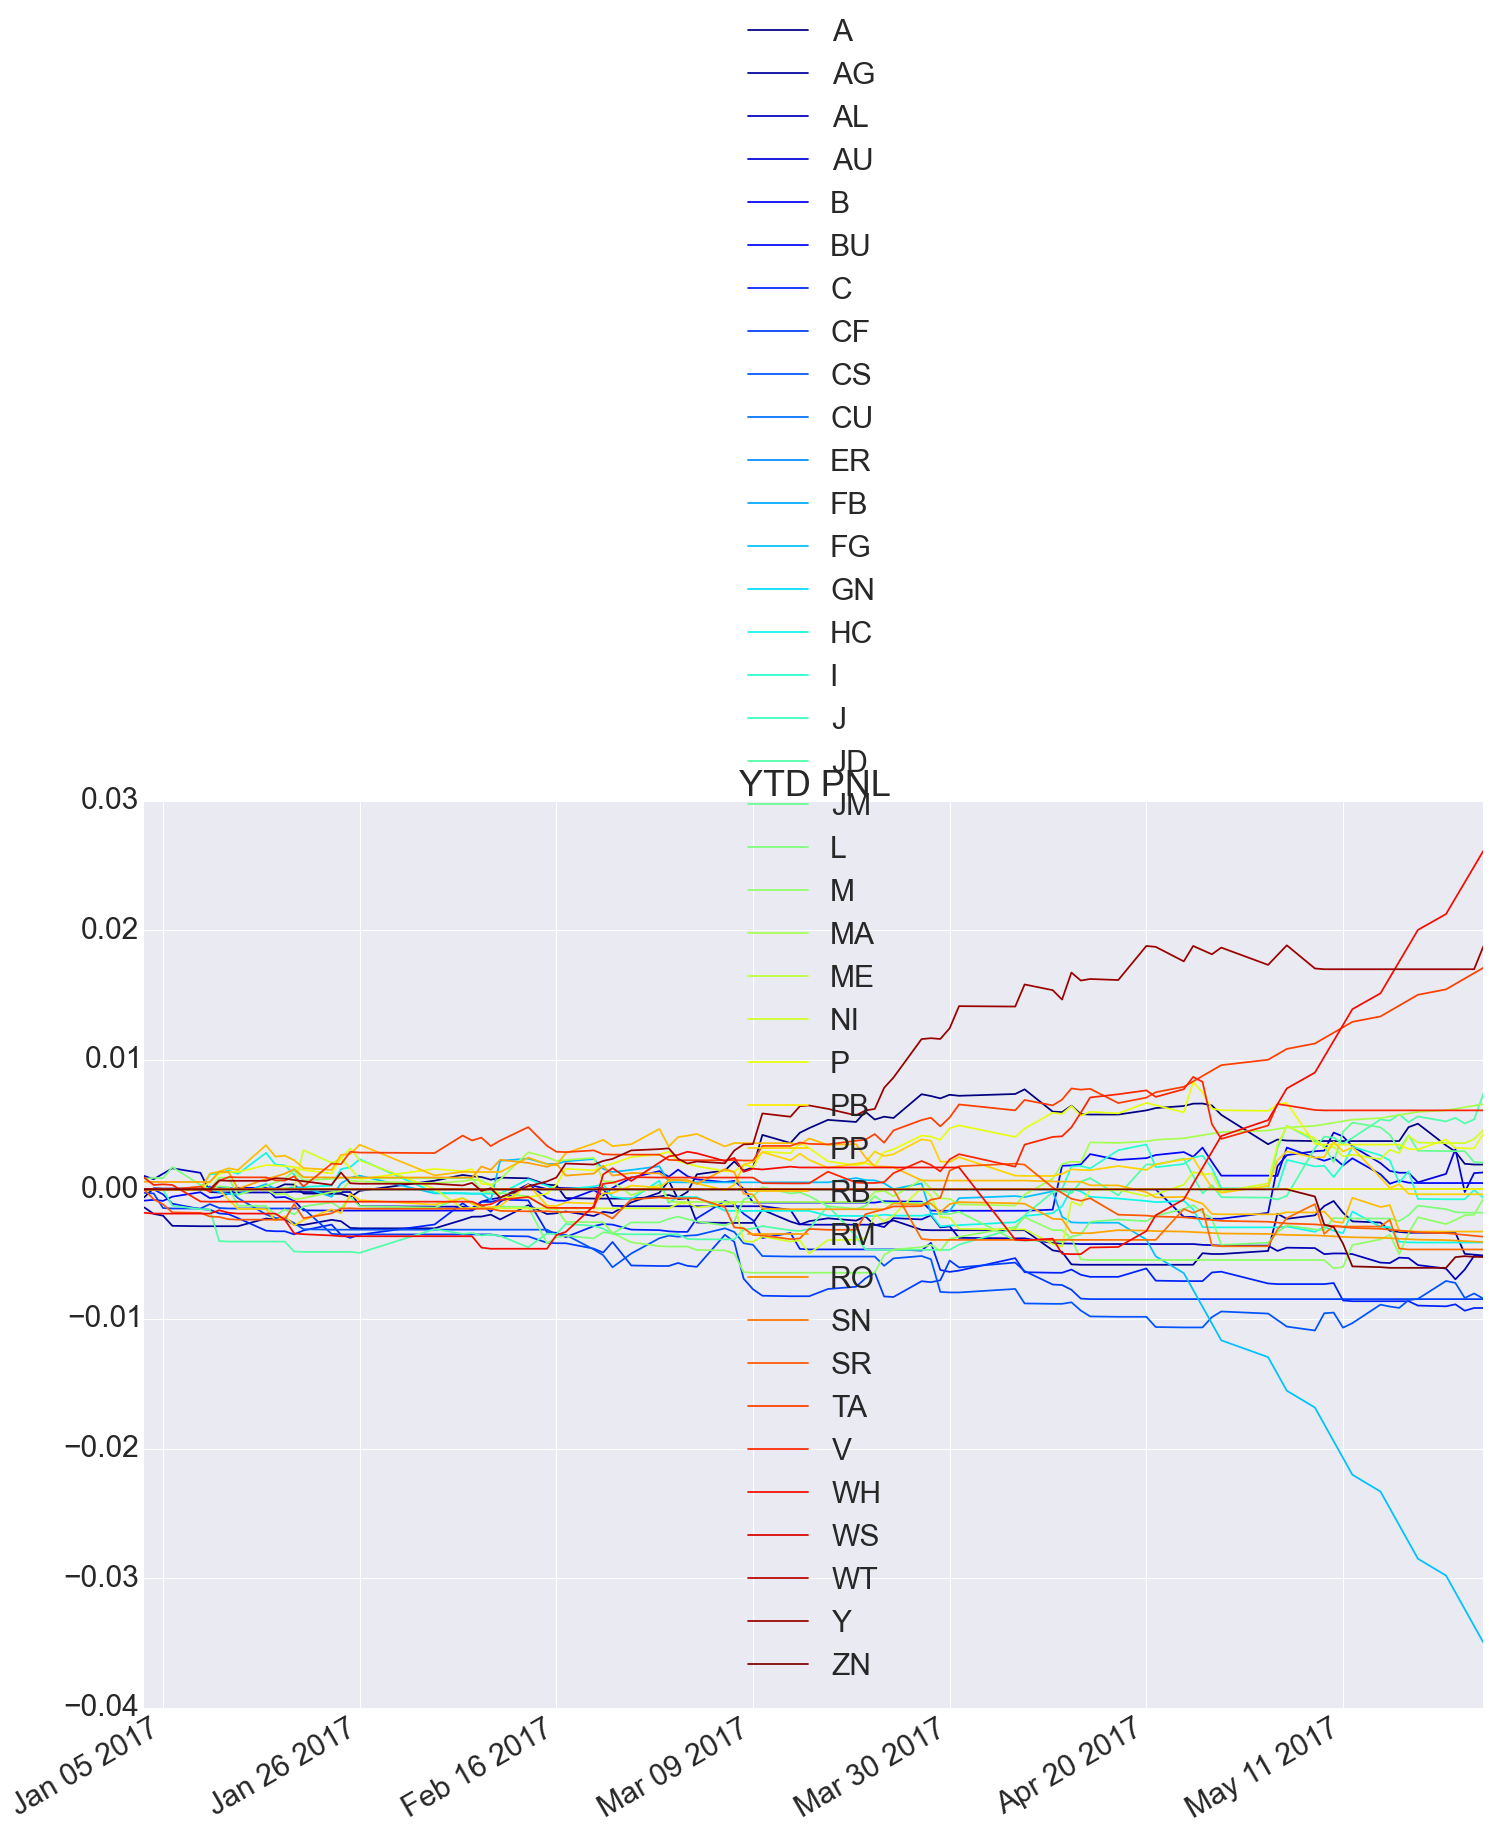

In [38]:
(PNL['2017':].dropna(how='all').ffill()/FundAUM).cumsum().plot(colormap='jet',title='YTD PNL')